<a href="https://colab.research.google.com/github/anthonysimonIsCoding/anthonysimonIsCoding/blob/main/PTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
!pip install pandas seaborn Bokeh matplotlib

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CheckboxGroup, CustomJS
from bokeh.io import output_notebook
from bokeh.plotting import figure

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Contents/HR_comma_sep.csv")

# Làm sạch dữ liệu
*  Kiểm tra các giá trị null
*  Kiểm tra dữ liệu trùng lắp






In [87]:
#Kiểm tra tổng các giá trị null trong mỗi thuộc tính
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [88]:
#Loại bỏ dữ liệu có giá trị null
df.dropna(inplace=True)

In [89]:
#Kiểm tra trùng lắp
df.duplicated().sum()

np.int64(3008)

In [90]:
#Loại bỏ các giá trị trùng
df.drop_duplicates(inplace=True)

# Nội dung 1 - Châu Gia Anh


In [91]:
#Kiểm tra tổng số cột và hàng của dữ liệu : (hàng, cột)
df.shape

(11991, 10)

In [92]:
# Các thông tin về kiểu dữ liệu, tên trường
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [93]:
# Miêu tả các thông số cơ bản của dữ liệu
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


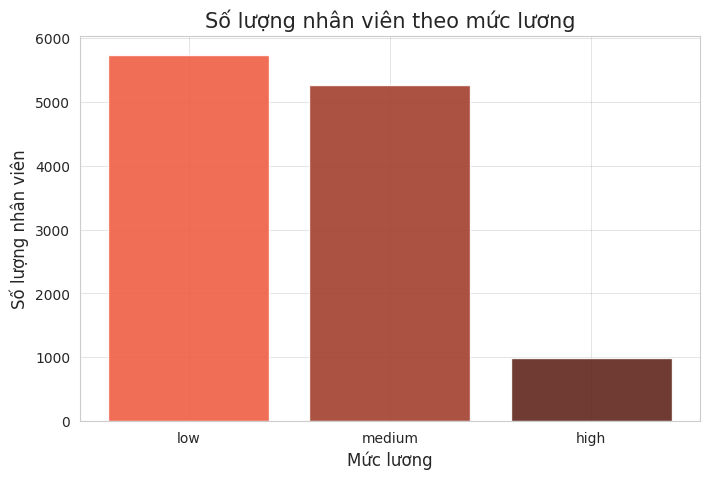

In [94]:

# Đếm số lượng nhân viên theo từng mức lương
salary_counts = df['salary'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(salary_counts.index, salary_counts.values, color=['#F05E43', '#A33F2E', '#5F251B'], alpha = 0.9)

# Thêm tiêu đề và nhãn
plt.grid("--", alpha=0.1, color="black")
plt.xlabel("Mức lương", size = 12)
plt.ylabel("Số lượng nhân viên", size = 12)
plt.title("Số lượng nhân viên theo mức lương", size = 15)

# Hiển thị biểu đồ
plt.show()

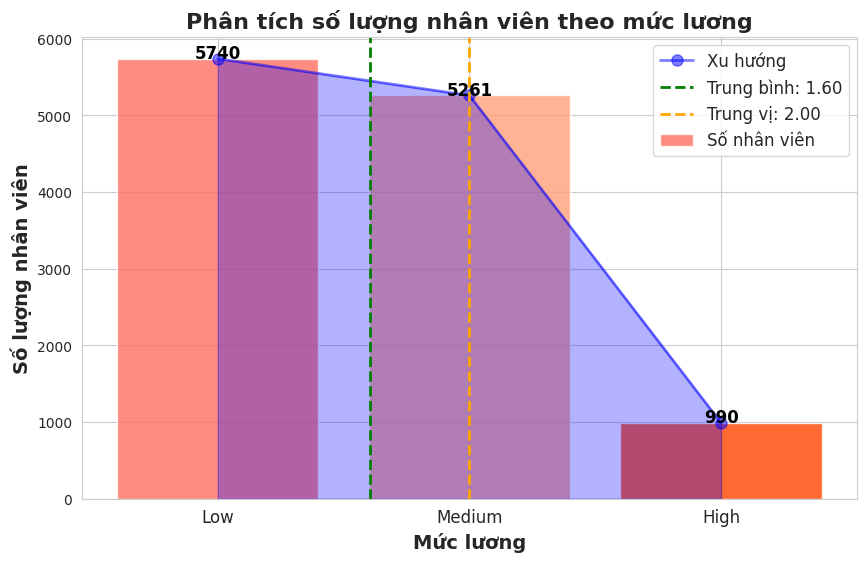

In [95]:
# BƯỚC 1: Chuyển đổi mức lương sang số
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary'] = df['salary'].map(salary_mapping)

# BƯỚC 2: Đếm số lượng nhân viên theo mức lương
salary_counts = df['salary'].value_counts().sort_index()

# BƯỚC 3: Tính toán thống kê cơ bản
mean_salary = df['salary'].mean()
median_salary = df['salary'].median()
std_salary = df['salary'].std()
mode_salary = salary_counts.idxmax() if not salary_counts.empty else None  # Kiểm tra tránh lỗi

# BƯỚC 4: Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ cột
bars = plt.bar(salary_counts.index, salary_counts.values, color=['#FF6F61', '#FFA07A', '#FF4500'], label="Số nhân viên", alpha=0.8)

# Vẽ đường xu hướng
x_vals = salary_counts.index
y_vals = salary_counts.values
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue', markersize=8, linewidth=2, label="Xu hướng", alpha = 0.5)

# Vẽ vùng bóng dưới đường xu hướng
plt.fill_between(x_vals, y_vals, color='blue', alpha=0.3)

# Đánh dấu mức lương phổ biến nhất
if mode_salary is not None:
    for bar in bars:
        if bar.get_x() == mode_salary:
            bar.set_color("#D72638")  # Màu đỏ nổi bật

# Thêm nhãn giá trị trên từng cột & điểm xu hướng
for i, txt in enumerate(y_vals):
    plt.text(x_vals[i], y_vals[i] + 0.4, f"{txt}", ha='center', fontsize=12, color='black', fontweight='bold')

# Thêm đường trung bình & trung vị
plt.axvline(mean_salary, color="green", linestyle="--", lw=2, label=f"Trung bình: {mean_salary:.2f}")
plt.axvline(median_salary, color="orange", linestyle="--", lw=2, label=f"Trung vị: {median_salary:.2f}")

# Hoàn thiện biểu đồ
plt.xlabel("Mức lương", fontsize=14, fontweight='bold')
plt.ylabel("Số lượng nhân viên", fontsize=14, fontweight='bold')
plt.title("Phân tích số lượng nhân viên theo mức lương", fontsize=16, fontweight='bold')

# Đổi nhãn trục X thành chữ
plt.xticks(ticks=[1, 2, 3], labels=['Low', 'Medium', 'High'], fontsize=12)

# Hiển thị chú thích
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.show()


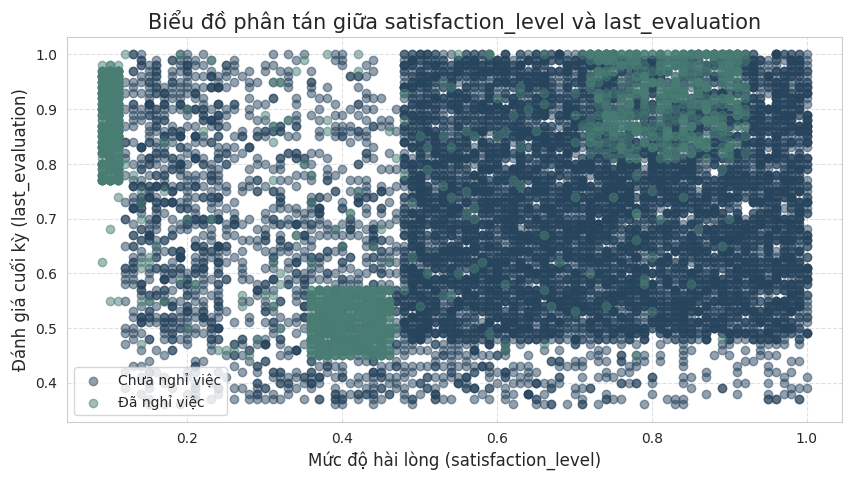

In [96]:
# Tạo hai nhóm: Nhân viên đã nghỉ và chưa nghỉ
df_left = df[df['left'] == 1]  # Nhân viên đã nghỉ việc
df_stay = df[df['left'] == 0]  # Nhân viên vẫn làm việc

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 5))
plt.scatter(df_stay['satisfaction_level'], df_stay['last_evaluation'],
            color='#27445D', alpha=0.5, label="Chưa nghỉ việc")
plt.scatter(df_left['satisfaction_level'], df_left['last_evaluation'],
            color='#497D74', alpha=0.5, label="Đã nghỉ việc")

# Thêm tiêu đề và nhãn
plt.xlabel("Mức độ hài lòng (satisfaction_level)", size = 12)
plt.ylabel("Đánh giá cuối kỳ (last_evaluation)", size = 12)
plt.title("Biểu đồ phân tán giữa satisfaction_level và last_evaluation", size = 15)
plt.legend()  # Hiển thị chú thích
plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới giúp dễ nhìn

# Hiển thị biểu đồ
plt.show()

# Nội dung 2 - Đào Thị Thanh Tâm

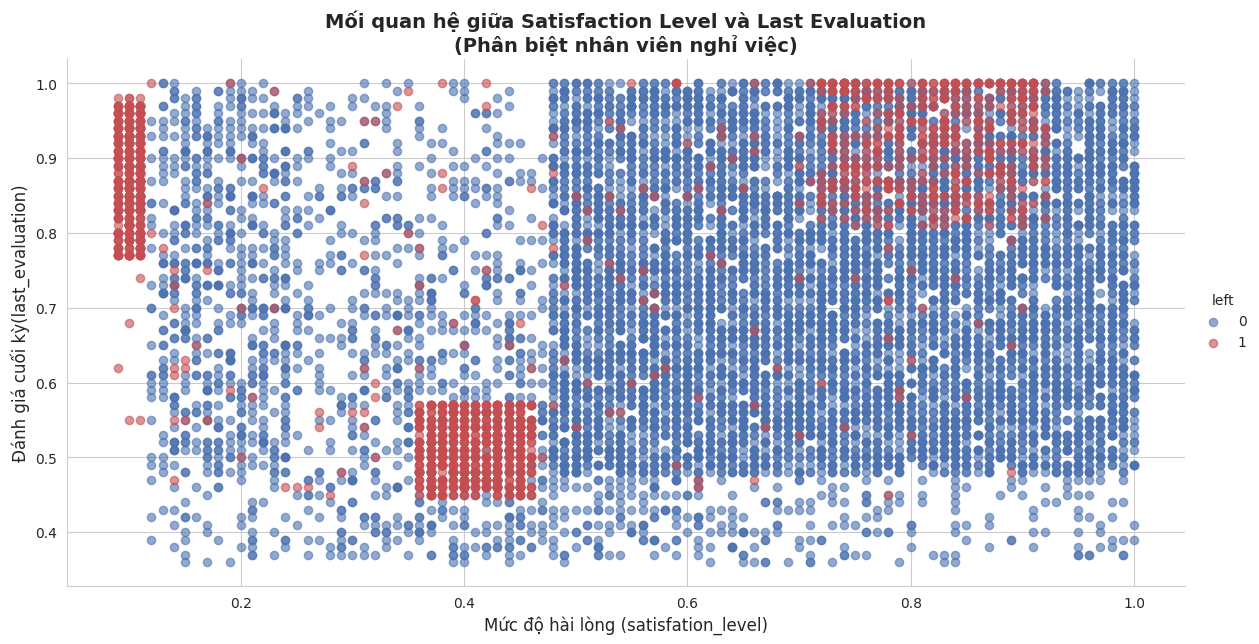

In [97]:
# im plot
pastel_palette = {0: "#4c72b0", 1: "#c44e52"}
sns.set_style("whitegrid")
sns.lmplot(
    x="satisfaction_level",
    y="last_evaluation",
    data=df,
    fit_reg=False,  # Không vẽ đường hồi quy
    hue="left",  # Phân biệt màu theo trạng thái nghỉ việc
    palette=pastel_palette,
    height=6,  # Chiều cao biểu đồ
    aspect=2,  # Tỷ lệ khung hình (rộng hơn)
    scatter_kws={'s': 35, 'alpha': 0.6}  # Kích thước điểm (s), độ trong suốt (alpha)
)

# Tùy chỉnh nhãn và tiêu đề
plt.xlabel("Mức độ hài lòng (satisfation_level)", fontsize=12)
plt.ylabel("Đánh giá cuối kỳ(last_evaluation)", fontsize=12)
plt.title("Mối quan hệ giữa Satisfaction Level và Last Evaluation\n(Phân biệt nhân viên nghỉ việc)", fontsize=14, fontweight="bold")

# Hiển thị biểu đồ
plt.show()

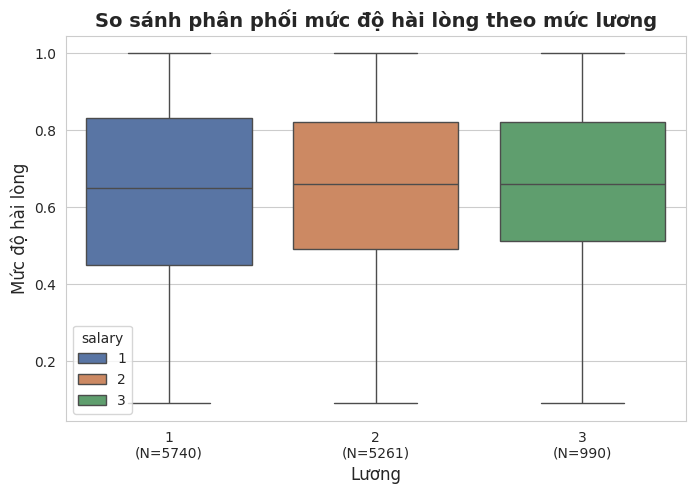

In [98]:
 # box plot
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.boxplot(
    x='salary',
    y='satisfaction_level',
    data=df,
    hue='salary',
    palette="deep",

)
# Đếm số nhân viên theo từng mức lương
salary_counts = df['salary'].value_counts().reindex(df['salary'].unique())

# Cập nhật tick labels
ax.set_xticks(range(len(salary_counts)))
ax.set_xticklabels([f"{cat}\n(N={salary_counts[cat]})" for cat in salary_counts.index])

plt.title("So sánh phân phối mức độ hài lòng theo mức lương", fontsize=14, fontweight='bold')
plt.xlabel("Lương", fontsize=12)
plt.ylabel("Mức độ hài lòng", fontsize=12)

plt.show()


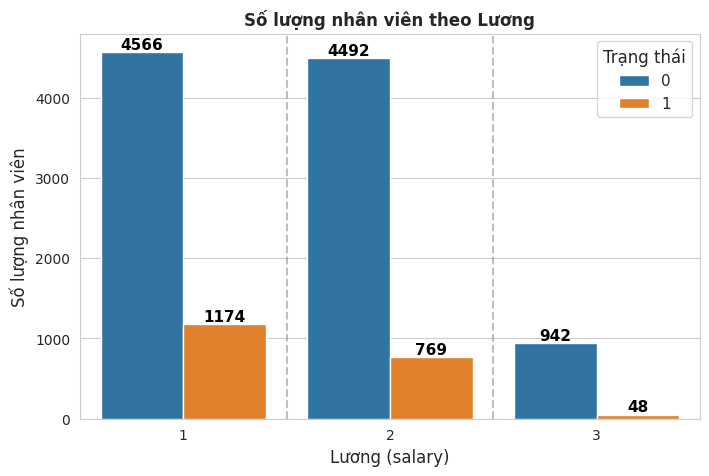

In [99]:
# count plot
plt.figure(figsize=(8, 5))  # Điều chỉnh kích thước biểu đồ
sns.set_style("whitegrid")  # Cài đặt kiểu lưới
ax = sns.countplot(
    x='salary',
    data=df,
    hue='left')
for p in ax.patches:
    if p.get_height() > 0:  # Kiểm tra nếu cột có giá trị lớn hơn 0
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom',
            fontsize=11, fontweight='bold', color='black'
        )
for x in range(len(df['salary'].unique()) - 1):
    plt.axvline(x + 0.5, color='gray', linestyle='--', alpha=0.5)
plt.title("Số lượng nhân viên theo Lương", fontweight='bold')
plt.xlabel("Lương (salary)", fontsize=12)
plt.ylabel("Số lượng nhân viên", fontsize=12)
plt.legend(title="Trạng thái", title_fontsize=12, fontsize=11)
plt.show()

# Nội dung 3 - Dương Lê Khánh


In [100]:
output_notebook()

### 📊 1. Biểu đồ cột: Số lượng nhân viên theo Mức lương (salary) ###
salary_counts = df["salary"].value_counts()

bar_source = ColumnDataSource(data={
    'mức_lương': salary_counts.index.tolist(),  # Mức lương (salary)
    'số_lượng': salary_counts.values.tolist()   # Số lượng nhân viên
})

bar_chart = figure(x_range=[str(x) for x in salary_counts.index.tolist()],  # Chuyển index thành chuỗi
    title="Số lượng nhân viên theo Mức lương",
    x_axis_label="Mức lương (salary)",
    y_axis_label="Số lượng nhân viên",
    width=800,
    height=400)

bar_chart.vbar(x='mức_lương', top='số_lượng', width=0.6, source=bar_source, color="#FF9800")

### 🎯 2. Biểu đồ phân tán: Mức độ hài lòng (satisfaction_level) vs Đánh giá gần nhất (last_evaluation) ###
color_map = {0: "#7B1FA2", 1: "#00BFA5"}  # 0: Tím, 1: Xanh ngọc
  # 1: Đã nghỉ việc, 0: Còn làm việc
colors = [color_map[left] for left in df["left"]]

scatter_source = ColumnDataSource(data={
    'mức_độ_hài_lòng': df['satisfaction_level'],  # Mức độ hài lòng (satisfaction_level)
    'đánh_giá_gần_nhất': df['last_evaluation'],  # Đánh giá gần nhất (last_evaluation)
    'số_dự_án': df['number_project'],  # Số lượng dự án (number_project)
    'giờ_làm_việc_tb_tháng': df['average_montly_hours'],  # Giờ làm trung bình/tháng (average_montly_hours)
    'số_năm_công_tác': df['time_spend_company'],  # Số năm làm việc (time_spend_company)
    'tai_nạn_lao_động': df['Work_accident'],  # Tai nạn lao động (Work_accident)
    'nghỉ_việc': df['left'],  # Nghỉ việc hay không (left)
    'được_thăng_chức_5_năm': df['promotion_last_5years'],  # Được thăng chức trong 5 năm (promotion_last_5years)
    'phòng_ban': df['sales'],  # Phòng ban (sales)
    'mức_lương': df['salary'],  # Mức lương (salary)
    'màu': colors
})

scatter_plot = figure(title="Biểu đồ phân tán: Mức độ hài lòng vs Đánh giá gần nhất",
                      x_axis_label="Mức độ hài lòng (satisfaction_level)",
                      y_axis_label="Đánh giá gần nhất (last_evaluation)",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

scatter_plot.scatter('mức_độ_hài_lòng', 'đánh_giá_gần_nhất', source=scatter_source, size=5, color='màu', alpha=0.6)

hover = HoverTool()
hover.tooltips = [
    ("Mức độ hài lòng", "@mức_độ_hài_lòng"),
    ("Đánh giá gần nhất", "@đánh_giá_gần_nhất"),
    ("Số dự án", "@số_dự_án"),
    ("Giờ làm trung bình/tháng", "@giờ_làm_việc_tb_tháng"),
    ("Số năm công tác", "@số_năm_công_tác"),
    ("Tai nạn lao động", "@tai_nạn_lao_động"),
    ("Nghỉ việc", "@nghỉ_việc"),
    ("Thăng chức trong 5 năm", "@được_thăng_chức_5_năm"),
    ("Phòng ban", "@phòng_ban"),
    ("Mức lương", "@mức_lương")
]
scatter_plot.add_tools(hover)

### 🏗️ Xếp dọc 2 biểu đồ ###
layout = column(bar_chart, scatter_plot)
show(layout)


In [101]:


output_notebook()  # Hiển thị trong Jupyter Notebook

### 🎯 Biểu đồ phân tán: Satisfaction Level vs Last Evaluation ###
color_map = {0: "#7B1FA2", 1: "#00BFA5"}  # 0: Tím, 1: Xanh ngọc

# Dữ liệu chia theo nhóm
df_0 = df[df["left"] == 0]
df_1 = df[df["left"] == 1]

source_0 = ColumnDataSource(data={'x': df_0['satisfaction_level'], 'y': df_0['last_evaluation'], 'salary': df_0['salary']})
source_1 = ColumnDataSource(data={'x': df_1['satisfaction_level'], 'y': df_1['last_evaluation'], 'salary': df_1['salary']})

scatter_plot = figure(title="Scatter Plot: Satisfaction Level vs Last Evaluation",
                      x_axis_label="Satisfaction Level",
                      y_axis_label="Last Evaluation",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

# Thêm 2 nhóm dữ liệu với màu sắc khác nhau
scatter_0 = scatter_plot.scatter('x', 'y', source=source_0, size=5, color=color_map[0], alpha=0.6, legend_label="Chưa nghỉ việc")
scatter_1 = scatter_plot.scatter('x', 'y', source=source_1, size=5, color=color_map[1], alpha=0.6, legend_label="Đã nghỉ việc")

hover = HoverTool()
hover.tooltips = [("Salary", "@salary")]
scatter_plot.add_tools(hover)

### 🔘 Thêm Checkbox để ẩn/hiện nhóm ###
checkbox = CheckboxGroup(labels=["Chưa nghỉ việc", "Đã nghỉ việc"], active=[0, 1])  # Mặc định cả 2 đều hiển thị

# CustomJS để điều khiển visibility
callback = CustomJS(args={'scatter_0': scatter_0, 'scatter_1': scatter_1, 'checkbox': checkbox}, code="""
    scatter_0.visible = checkbox.active.includes(0);
    scatter_1.visible = checkbox.active.includes(1);
""")
checkbox.js_on_change("active", callback)

### 🏗️ Xếp dọc Checkbox và Scatter Plot ###
layout = column(checkbox, scatter_plot)
show(layout)


In [102]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, RangeSlider, CustomJS
from bokeh.layouts import column
import pandas as pd

output_notebook()

# Đọc dữ liệu từ CSV
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Contents/HR_comma_sep.csv")

# Xác định giá trị min và max cho thanh trượt
min_value = df['satisfaction_level'].min()
max_value = df['satisfaction_level'].max()

# Biểu đồ phân tán - Mức độ hài lòng (satisfaction_level) vs Đánh giá gần nhất (last_evaluation)
color_map = {0: "#7B1FA2", 1: "#00BFA5"}  # 0: Chưa nghỉ việc (Tím), 1: Đã nghỉ việc (Xanh ngọc)
colors = [color_map[left] for left in df["left"]]

scatter_source = ColumnDataSource(data={
    'mức_độ_hài_lòng': df['satisfaction_level'],  # Mức độ hài lòng (satisfaction_level)
    'đánh_giá_gần_nhất': df['last_evaluation'],  # Đánh giá gần nhất (last_evaluation)
    'mức_lương': df['salary'],  # Mức lương (salary)
    'nghỉ_việc': df['left'].astype(str),  # Nghỉ việc (left)
    'màu': colors
})

scatter_plot = figure(title="Biểu đồ phân tán: Mức độ hài lòng vs Đánh giá gần nhất",
                      x_axis_label="Mức độ hài lòng (satisfaction_level)",
                      y_axis_label="Đánh giá gần nhất (last_evaluation)",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

scatter_plot.scatter('mức_độ_hài_lòng', 'đánh_giá_gần_nhất', source=scatter_source, size=5, color='màu', alpha=0.6)  # Giảm size từ 8 xuống 5

hover = HoverTool()
hover.tooltips = [("Mức lương", "@mức_lương"), ("Nghỉ việc", "@nghỉ_việc")]
scatter_plot.add_tools(hover)

# Thanh trượt lọc theo mức độ hài lòng
range_slider = RangeSlider(start=min_value, end=max_value, value=(min_value, max_value), step=0.01, title="Khoảng mức độ hài lòng", sizing_mode="stretch_width")

slider_callback = CustomJS(args=dict(source=scatter_source, original_source=scatter_source.data), code="""
    var data = source.data;
    var original_data = original_source;
    var range = cb_obj.value;

    var new_x = [];
    var new_y = [];
    var new_salary = [];
    var new_left = [];
    var new_color = [];

    for (var i = 0; i < original_data['mức_độ_hài_lòng'].length; i++) {
        if (original_data['mức_độ_hài_lòng'][i] >= range[0] && original_data['mức_độ_hài_lòng'][i] <= range[1]) {
            new_x.push(original_data['mức_độ_hài_lòng'][i]);
            new_y.push(original_data['đánh_giá_gần_nhất'][i]);
            new_salary.push(original_data['mức_lương'][i]);
            new_left.push(original_data['nghỉ_việc'][i]);
            new_color.push(original_data['màu'][i]);
        }
    }

    data['mức_độ_hài_lòng'] = new_x;
    data['đánh_giá_gần_nhất'] = new_y;
    data['mức_lương'] = new_salary;
    data['nghỉ_việc'] = new_left;
    data['màu'] = new_color;

    source.change.emit();
""")

range_slider.js_on_change("value", slider_callback)

# Xếp dọc thanh trượt và biểu đồ
layout = column(range_slider, scatter_plot)
show(layout)
